In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:
from keras import layers, models
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
import numpy as np

Using TensorFlow backend.


In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [5]:
len(train_data), len(test_data)

(8982, 2246)

In [6]:
train_data[10][0:13]

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26]

In [7]:
train_labels[10]

3

In [8]:
word_index = reuters.get_word_index()

In [9]:
reverse_word_index = {value: key for key, value in word_index.items()}

In [10]:
' '.join(
 [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

In [12]:
vectorized_x = vectorize_sequence(train_data)
one_hot_encoeded_y = to_categorical(train_labels)

x_train = vectorized_x[1000:]
x_val = vectorized_x[0:1000]
y_train = one_hot_encoeded_y[1000:]
y_val = one_hot_encoeded_y[0:1000]

x_test = vectorize_sequence(test_data)
y_test = to_categorical(test_labels)

In [13]:
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
history = network.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 252us/step - loss: 2.5333 - acc: 0.4946 - val_loss: 1.7233 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 103us/step - loss: 1.4500 - acc: 0.6868 - val_loss: 1.3499 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 123us/step - loss: 1.0997 - acc: 0.7641 - val_loss: 1.1717 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 107us/step - loss: 0.8718 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.7044 - acc: 0.8472 - val_loss: 0.9833 - val_acc: 0.7860
Epoch 6/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.5675 - acc: 0.8796 - val_loss: 0.9377 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.4599 - a

In [15]:
def adjust_axes(axis_obj, x_label_fontsize, y_label_fontsize, x_label_rotation=0, y_label_rotation=0):
    for tick in axis_obj.xaxis.get_major_ticks():
        tick.label.set_fontsize(x_label_fontsize)
    for tick in axis_obj.yaxis.get_major_ticks():
        tick.label.set_fontsize(y_label_fontsize)
    for tick in axis_obj.xaxis.get_major_ticks():
        tick.label.set_rotation(x_label_rotation)
    for tick in axis_obj.yaxis.get_major_ticks():
        tick.label.set_rotation(y_label_rotation)        

In [16]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

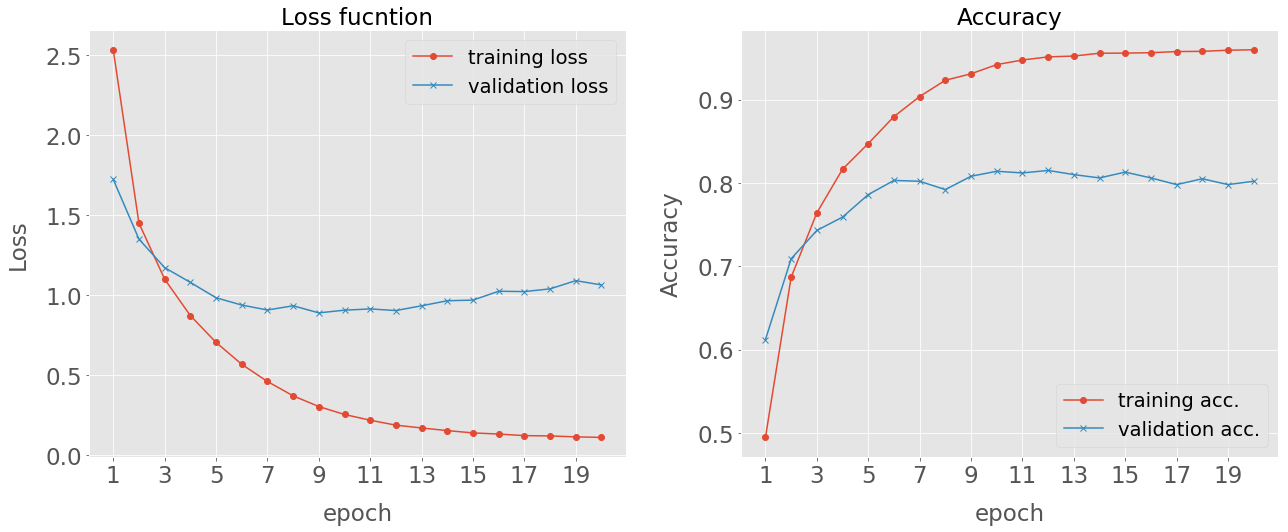

In [17]:
FONTSIZE = 23
plt.close('all')
fig = plt.figure(figsize=(18, 7.5))
gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1])

epochs = range(1, len(history.history['loss']) + 1)

# plot loss function
train_loss = history.history['loss']
val_loss = history.history['val_loss']
ax = plt.subplot(gs[0, 0])
ax.plot(epochs, train_loss, marker='o', label='training loss')
ax.plot(epochs, val_loss, marker='x', label='validation loss')
ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('Loss', fontsize=FONTSIZE, labelpad=15)
ax.set_xticks(np.arange(1, len(epochs)+1, 2))
adjust_axes(ax, FONTSIZE, FONTSIZE, 0, 0)
ax.legend(loc='best', fontsize=FONTSIZE*0.85)
ax.set_title('Loss fucntion', fontsize=FONTSIZE)


# plot acuracy
train_acuracy = history.history['acc']
val_accuracy = history.history['val_acc']
ax = plt.subplot(gs[0, 1])
ax.plot(epochs, train_acuracy, marker='o', label='training acc.')
ax.plot(epochs, val_accuracy, marker='x', label='validation acc.')
ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('Accuracy', fontsize=FONTSIZE, labelpad=15)
ax.set_xticks(np.arange(1, len(epochs)+1, 2))
adjust_axes(ax, FONTSIZE, FONTSIZE, 0, 0)
ax.legend(loc='best', fontsize=FONTSIZE*0.85)
ax.set_title('Accuracy', fontsize=FONTSIZE)

plt.tight_layout(w_pad=3.0, h_pad=1)

### Use 9 epochs to train another model

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512    
)


Epoch 1/9
7982/7982 [==============================] - 2s 195us/step - loss: 2.5396 - acc: 0.5226
Epoch 2/9
7982/7982 [==============================] - 1s 110us/step - loss: 1.3722 - acc: 0.7117
Epoch 3/9
7982/7982 [==============================] - 1s 137us/step - loss: 1.0162 - acc: 0.7793
Epoch 4/9
7982/7982 [==============================] - 1s 98us/step - loss: 0.8001 - acc: 0.8244
Epoch 5/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.6412 - acc: 0.8619
Epoch 6/9
7982/7982 [==============================] - 1s 129us/step - loss: 0.5137 - acc: 0.8916
Epoch 7/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.4129 - acc: 0.9138
Epoch 8/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.3359 - acc: 0.9281
Epoch 9/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.2786 - acc: 0.9375


In [19]:
results = model.evaluate(x_test, y_test)
results

2246/2246 [==============================] - 0s 143us/step


[1.0219570329331544, 0.7769367765446168]

In [20]:
predict_test = model.predict(x_test)

In [21]:
predict_test.shape

(2246, 46)

In [22]:
np.sum(predict_test[0])

0.99999964

In [23]:
np.argmax(predict_test[0]), test_labels[0]

(3, 3)